# Feature Engg : Advanced House Price Prediction EDA

Steps :
1] Missing Values
2] Temporal Variables
3] Categorical Variables : Removal of rare labels
4] Standardization of the values of the variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['SalePrice'], test_size=0.1, random_state=0)

In [4]:
# Handling of Categorical Features which are missing

categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features
print("No. of categorical features : {}".format(len(categorical_features)))

dataset = df.copy()
catNA_features = [feature for feature in categorical_features if dataset[feature].isnull().sum() > 1]
print("No. of categorical features with missing values : {}".format(len(catNA_features)))
dataset[catNA_features] 

for feature in catNA_features:
    print("{} : {} Missing values ({}%)".format(feature, dataset[feature].isnull().sum(), np.round(dataset[feature].isnull().mean(), 4)))
    


No. of categorical features : 43
No. of categorical features with missing values : 15
Alley : 1369 Missing values (0.9377%)
MasVnrType : 8 Missing values (0.0055%)
BsmtQual : 37 Missing values (0.0253%)
BsmtCond : 37 Missing values (0.0253%)
BsmtExposure : 38 Missing values (0.026%)
BsmtFinType1 : 37 Missing values (0.0253%)
BsmtFinType2 : 38 Missing values (0.026%)
FireplaceQu : 690 Missing values (0.4726%)
GarageType : 81 Missing values (0.0555%)
GarageFinish : 81 Missing values (0.0555%)
GarageQual : 81 Missing values (0.0555%)
GarageCond : 81 Missing values (0.0555%)
PoolQC : 1453 Missing values (0.9952%)
Fence : 1179 Missing values (0.8075%)
MiscFeature : 1406 Missing values (0.963%)


In [5]:
# Replacing the NaN values of the features with a label
df[catNA_features] = dataset[catNA_features].fillna("Missing")


# print("{} : {} Missing values ({}%)".format(feature, df[catNA_features].isnull().sum(), np.round(df[catNA_features].isnull().mean(), 4)))
df[catNA_features].isnull().sum()    
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [6]:
# Missing values in numerical variables

numericalNaN_variables = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!="O"]
numericalNaN_variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [7]:
for feature in numericalNaN_variables:
    print("{} : {} Missing values ({}%)".format(feature, df[feature].isnull().sum(), np.round(df[feature].isnull().mean(), 4)))

LotFrontage : 259 Missing values (0.1774%)
MasVnrArea : 8 Missing values (0.0055%)
GarageYrBlt : 81 Missing values (0.0555%)


In [8]:
for feature in numericalNaN_variables:
    df[feature+'nan'] = np.where(df[feature].isnull(), 1, 0) #Creating a new feature and setting value to 1 if misssing
    print("{} : Median = {}".format(feature, df[feature].median()))
    df[feature].fillna(df[feature].median(), inplace=True) #Replacing missing values as median
    
df[numericalNaN_variables].isnull().sum()    

LotFrontage : Median = 69.0
MasVnrArea : Median = 0.0
GarageYrBlt : Median = 1980.0


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [9]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Mis

In [10]:
# Temporal Variables

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'o']
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature and 'YrSold' not in feature]
year_features

sliced_year_features = []

i=0
for feature in year_features:

    if feature != 'YrSold' and feature != 'GarageYrBltnan':
        sliced_year_features.insert(i, feature)
        i=i+1
        
sliced_year_features        

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

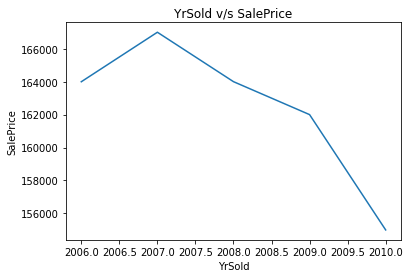

In [11]:
dataset = df.copy()
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.title('YrSold v/s SalePrice')
plt.show()

In [12]:
#It is observed that as the no. of years(YrSold) increases, the selling price decreses, which generally shouldn't happen.
#So, we gon replace the difference of YrSold and other year features in df

for feature in sliced_year_features:
    df[feature] = df['YrSold'] - df[feature]
    
df[sliced_year_features].head()     

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [13]:
df[numerical_features].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [14]:
# Numerical Varaibles
# As seen earlier, numerical variables are skewd up, and thus, need log transformation

numericalvariables_for_transformation = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in numericalvariables_for_transformation:
    df[feature] = np.log(df[feature])
    
df[numerical_features].head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [15]:
# Handling Rare Categorical Features

for feature in categorical_features:
#     newlist = []
#     print(df[feature].unique())
    newlist = set(value for value in df[feature])
    print(newlist)

{'RL', 'C (all)', 'RM', 'RH', 'FV'}
{'Grvl', 'Pave'}
{'Missing', 'Grvl', 'Pave'}
{'IR3', 'IR2', 'Reg', 'IR1'}
{'Low', 'Bnk', 'HLS', 'Lvl'}
{'AllPub', 'NoSeWa'}
{'CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'}
{'Sev', 'Mod', 'Gtl'}
{'NPkVill', 'NridgHt', 'Gilbert', 'OldTown', 'BrDale', 'Edwards', 'NoRidge', 'Crawfor', 'Sawyer', 'StoneBr', 'IDOTRR', 'BrkSide', 'SawyerW', 'SWISU', 'Blmngtn', 'Mitchel', 'Veenker', 'Blueste', 'ClearCr', 'NWAmes', 'NAmes', 'Timber', 'CollgCr', 'Somerst', 'MeadowV'}
{'RRAe', 'PosA', 'Feedr', 'Norm', 'PosN', 'Artery', 'RRNn', 'RRAn', 'RRNe'}
{'RRAe', 'PosA', 'Feedr', 'Norm', 'PosN', 'Artery', 'RRNn', 'RRAn'}
{'TwnhsE', '2fmCon', 'Twnhs', 'Duplex', '1Fam'}
{'2.5Fin', '2.5Unf', '1.5Unf', '1.5Fin', 'SLvl', '2Story', '1Story', 'SFoyer'}
{'Shed', 'Mansard', 'Flat', 'Gable', 'Gambrel', 'Hip'}
{'Metal', 'WdShngl', 'WdShake', 'Tar&Grv', 'ClyTile', 'Roll', 'CompShg', 'Membran'}
{'CemntBd', 'Plywood', 'CBlock', 'WdShing', 'AsbShng', 'VinylSd', 'Wd Sdng', 'MetalSd', 'BrkFac

In [16]:
df['MSZoning'].value_counts()['FV']

65

In [17]:
# for feature in categorical_features:
#     newlist = set(value for value in df[feature])
    
#     for value in newlist:
#         count = df[feature].value_counts()[value]
        
#         if count/df[feature].size <= 0.01:
#             print("Feature {} has value {} <= 1% || Value Count : {}, Total values : {}".format(feature, value, count, df[feature].size))
#             df[feature] = np.where(df[feature] == value, 'Rare', value)

In [18]:
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.1].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'Rare')   

In [19]:
df[categorical_features].head(100)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,Rare,Gtl,Rare,Rare,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Rare,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Rare,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Rare,None,TA,TA,Rare,TA,Rare,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Rare
4,RL,Pave,Missing,IR1,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,RL,Pave,Missing,Rare,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Rare,Rare,PConc,Gd,Rare,No,ALQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Rare,Fin,TA,TA,Y,Missing,Missing,Rare,WD,Normal
96,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
97,RL,Pave,Missing,Reg,Rare,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,Rare,Unf,GasA,TA,Y,Rare,TA,Typ,Missing,Attchd,Fin,TA,TA,Rare,Missing,Missing,Missing,WD,Normal
98,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,Rare,TA,TA,No,ALQ,Unf,GasA,Rare,Rare,SBrkr,TA,Typ,Missing,Rare,Unf,Rare,TA,Y,Missing,Missing,Rare,Rare,Rare


### Feature Scaling 

Some ML Algos require feature scaling to scale down the features to some range.
Algos which make use of the following concepts need feature scaling :

1) Euclidean Distance :
    The data pts in a 2D graph might have huge distances, which need to be scaled down.
    eg: KNN, K Means Clustering
    
2) Gradient Descent :
    The value of the coeff might be at a large distance from the pt. of convergence, i.e., the global minimum. Scaling down would bring the value closer to the global minimum, thus reducing computational time
    eg: Linear Regr, Deep Learning (CNN, ANN, RNN), etc.

Ensemble Techniques do not require feature scaling as the no. of branches remains same despite scaling the features down to some range since these use decision trees.

In [20]:
#Feature Scaling

for feature in categorical_features:

#     labels_ordered=df.groupby([feature])['SalePrice'].mean()
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    
    print(labels_ordered)
    print("*****")
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)
    df[feature]=df[feature].map(labels_ordered)
    print("*****")
    print(df[feature].head(5))

Index(['RM', 'Rare', 'RL'], dtype='object', name='MSZoning')
*****
{'RM': 0, 'Rare': 1, 'RL': 2}
*****
0    2
1    2
2    2
3    2
4    2
Name: MSZoning, dtype: int64
Index(['Rare', 'Pave'], dtype='object', name='Street')
*****
{'Rare': 0, 'Pave': 1}
*****
0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int64
Index(['Rare', 'Missing'], dtype='object', name='Alley')
*****
{'Rare': 0, 'Missing': 1}
*****
0    1
1    1
2    1
3    1
4    1
Name: Alley, dtype: int64
Index(['Reg', 'IR1', 'Rare'], dtype='object', name='LotShape')
*****
{'Reg': 0, 'IR1': 1, 'Rare': 2}
*****
0    0
1    0
2    1
3    1
4    1
Name: LotShape, dtype: int64
Index(['Lvl', 'Rare'], dtype='object', name='LandContour')
*****
{'Lvl': 0, 'Rare': 1}
*****
0    0
1    0
2    0
3    0
4    0
Name: LandContour, dtype: int64
Index(['Rare', 'AllPub'], dtype='object', name='Utilities')
*****
{'Rare': 0, 'AllPub': 1}
*****
0    1
1    1
2    1
3    1
4    1
Name: Utilities, dtype: int64
Index(['Inside', 'Corner', 'Rare

In [21]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,2,4.174387,9.041922,1,1,0,0,1,0,0,2,1,1,1,3,7,5,5,5,0,0,4,4,1,196.0,1,1,2,1,1,0,4,706,1,0,150,856,1,3,1,1,6.752270,854,0,7.444249,1,0,2,1,3,1,1,8,1,0,0,2,5.0,2,2,548,1,1,1,0,61,0,0,0,0,0,2,1,0,2,2008,0,0,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,1,1,0,0,1,2,0,1,0,1,1,2,6,8,31,31,0,0,1,1,0,0.0,0,1,1,1,1,1,2,978,1,0,284,1262,1,3,1,1,7.140453,0,0,7.140453,0,1,2,0,3,1,0,6,1,1,2,2,31.0,2,2,460,1,1,1,298,0,0,0,0,0,0,2,1,0,5,2007,0,0,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,1,1,1,0,1,0,0,2,1,1,1,3,7,5,7,6,0,0,4,4,1,162.0,1,1,2,1,1,1,4,486,1,0,434,920,1,3,1,1,6.824374,866,0,7.487734,1,0,2,1,3,1,1,6,1,1,2,2,7.0,2,2,608,1,1,1,0,42,0,0,0,0,0,2,1,0,9,2008,0,0,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,1,1,1,0,1,1,0,1,1,1,1,3,7,5,91,36,0,0,0,3,0,0.0,0,1,0,0,0,0,2,216,1,0,540,756,1,2,1,1,6.867974,756,0,7.448334,1,0,1,0,3,1,1,7,1,1,3,0,8.0,1,3,642,1,1,1,0,35,272,0,0,0,0,2,1,0,2,2006,0,1,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,1,1,1,0,1,2,0,1,1,1,1,3,8,5,8,8,0,0,4,4,1,350.0,1,1,2,1,1,2,4,655,1,0,490,1145,1,3,1,1,7.043160,1053,0,7.695303,1,0,2,1,4,1,1,9,1,1,2,2,8.0,2,3,836,1,1,1,192,84,0,0,0,0,0,2,1,0,12,2008,0,0,12.429216,0,0,0
5,6,50,2,4.442651,9.554993,1,1,1,0,1,0,0,1,1,1,1,0,5,5,16,14,0,0,4,4,0,0.0,0,1,0,1,1,0,4,732,1,0,64,796,1,3,1,1,6.679599,566,0,7.216709,1,0,1,1,1,1,0,5,1,0,0,2,16.0,1,2,480,1,1,1,40,30,0,320,0,0,0,0,0,700,10,2009,0,0,11.870600,0,0,0
6,7,20,2,4.317488,9.218705,1,1,0,0,1,0,0,1,1,1,1,2,8,5,3,2,0,0,4,4,2,186.0,1,1,2,2,1,2,4,1369,1,0,317,1686,1,3,1,1,7.434848,0,0,7.434848,1,0,2,0,3,1,1,7,1,1,3,2,3.0,2,2,636,1,1,1,255,57,0,0,0,0,0,2,1,0,8,2007,0,0,12.634603,0,0,0
7,8,60,2,4.234107,9.247829,1,1,1,0,1,1,0,1,0,1,1,3,7,6,36,36,0,0,2,2,2,240.0,0,1,1,1,1,1,2,859,0,32,216,1107,1,3,1,1,7.009409,983,0,7.644919,1,0,2,1,3,1,0,7,1,2,2,2,36.0,2,2,484,1,1,1,235,204,228,0,0,0,0,2,0,350,11,2009,0,0,12.206073,1,0,0
8,9,50,0,3.931826,8.719317,1,1,0,0,1,0,0,1,0,1,1,0,7,5,77,58,0,0,3,3,0,0.0,0,1,0,0,1,0,3,0,1,0,952,952,1,2,1,0,6.929517,752,0,7.480992,0,0,2,0,2,2,0,8,0,2,2,0,77.0,1,2,468,0,1,1,90,0,205,0,0,0,0,2,1,0,4,2008,0,1,11.774520,0,0,0
9,10,190,2,3.912023,8.911934,1,1,0,0,1,1,0,1,0,0,0,1,5,6,69,58,0,0,1,1,0,0.0,0,1,0,0,1,0,4,851,1,0,140,991,1,3,1,1,6.981935,0,0,6.981935,1,0,1,0,2,2,0,5,1,2,2,2,69.0,2,1,205,0,1,1,0,4,0,0,0,0,0,2,1,0,1,2008,0,0,11.678440,0,0,0


In [22]:
# We need to perform feature scaling for features except the dependent features and Id since it might be dropped in future

feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]
# # feature_scale=[numerical_features]
# len(feature_scale)
# # feature_scale[0][1]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [23]:
scaler.transform(df[feature_scale])

array([[0.23529412, 1.        , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 1.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 1.        , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
finaldf = pd.concat([df[['Id', 'SalePrice']], pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)], axis=1)
                    
finaldf

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,1.0,0.418208,0.366344,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.00,1.00,0.5,0.122500,0.5,1.0,1.0,0.5,1.0,0.0,1.00,0.125089,1.0,0.000000,0.064212,0.140098,1.0,1.000000,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.5,0.500000,1.0,0.000000,0.000000,1.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.090909,0.50,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,1.0,0.495064,0.391317,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,1.0,0.666667,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.25,0.25,0.0,0.000000,0.0,1.0,0.5,0.5,1.0,0.5,0.50,0.173281,1.0,0.000000,0.121575,0.206547,1.0,1.000000,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.0,0.333333,1.0,0.333333,0.666667,1.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.363636,0.25,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.00,1.00,0.5,0.101250,0.5,1.0,1.0,0.5,1.0,0.5,1.00,0.086109,1.0,0.000000,0.185788,0.150573,1.0,1.000000,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.5,0.333333,1.0,0.333333,0.666667,1.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.727273,0.50,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.5,0.0,1.0,0.5,0.0,0.5,1.0,1.0,1.0,1.000000,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.00,0.75,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.50,0.038271,1.0,0.000000,0.231164,0.123732,1.0,0.666667,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.5,0.416667,1.0,0.333333,1.000000,0.0,0.074766,0.333333,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.090909,0.00,0.0,1.0,0.0,0.0,0.0
4,5,12.429216,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.5,0.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.000000,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.00,1.00,0.5,0.218750,0.5,1.0,1.0,0.5,1.0,1.0,1.00,0.116052,1.0,0.000000,0.209760,0.187398,1.0,1.000000,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.5,0.583333,1.0,0.333333,0.666667,1.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,1.000000,0.50,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.235294,1.0,0.400718,0.353592,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0,1.000000,0.555556,0.500,0.058824,0.131148,0.0,0.0,1.00,1.00,0.0,0.000000,0.0,1.0,1.0,0.5,1.0,0.0,0.75,0.000000,1.0,0.000000,0.407962,0.155974,1.0,1.000000,1.0,1.0,0.

In [27]:
finaldf.to_csv('X_train.csv', index=False)